# Frozen Lake Assignment
Grzegorz Malisz
Student Number: 4852370

## Imports

In [12]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

MOVING = True  # extra cleaner plot with moving-average of reward
if MOVING:
    from scipy.signal import savgol_filter

## Sample code as function

In [13]:
def reinforced_learning_and_plots(learning_rate=0.1,
                                  discount_factor=0.9,
                                  episodes=4 * 1000,
                                  t=100,
                                  exploration_rate=0.01,
                                  cost_of_living=- 0.01,
                                  frequent_rewards=False,
                                  is_slippery=False):
    # # hyper parameters
    # learning_rate = 0.1 #impacts how fast we update our estimates
    # discount_factor = 0.9 # gamma, impacts the return calculations
    # episodes = 4*1000 # number of episodes to learn, keep this a multiple of four for nice plotting
    # t = 100  # Maximum steps in an episode
    # exploration_rate = 0.5  # Exploration rate
    # cost_of_living = - 0.01 # used when frequent_rewards = True, incentive the agent for efficiency by incurring a cost to each move
    # frequent_rewards = False # when False the original environment rewards are used, if True the agent in incentivised to be efficient and avoid holes (how?)
    # is_slippery = False
    # Choose environment

    env = gym.make("FrozenLake8x8-v1", is_slippery=is_slippery)

    Q = np.zeros([env.observation_space.n, env.action_space.n])
    rewards_per_episode = []
    q_values_at_intervals = []  # Store Q-values at intervals

    for episode in range(episodes):
        state, prob = env.reset()
        total_reward = 0

        for step in range(t):
            # Choose action based on epsilon-greedy policy
            if np.random.rand() < exploration_rate:
                action = np.random.choice(env.action_space.n)
            else:
                action = np.argmax(Q[state, :])

            new_state, reward, terminated, truncated, info = env.step(action)

            if frequent_rewards:
                if terminated & (reward == 0):
                    reward = reward - 1

                reward = reward + cost_of_living

            # Update Q-value using Q-learning equation
            Q[state, action] += learning_rate * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action])
            total_reward += reward
            state = new_state

            if terminated:
                #if reward == 1 + cost_of_living:
                    # print(f"Episode {episode} finished after {step + 1} steps. Success!")
                break

        rewards_per_episode.append(total_reward)

        # Store Q-values at intervals (e.g., every 100 episodes)
        if (episode + 1) % (episodes // 4) == 0:
            q_values_at_intervals.append(np.copy(Q))  # Store a copy of Q-values
    # Plotting rewards per episode
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(rewards_per_episode, label='Total Reward')
    plt.title('Rewards per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')

    # the plot is too noisy, you can use the scipy package to calculate a moving average
    if MOVING:
        moving_average_window = 20
        moving_averages = savgol_filter(rewards_per_episode, moving_average_window, 3)
        plt.plot(moving_averages, label=f'Moving Average (Window {moving_average_window})', color='orange')

    plt.legend()

    # Plotting the heatmap of Q-values at intervals
    fig, ax = plt.subplots(1, len(q_values_at_intervals), figsize=(15, 5))

    for i, q_values in enumerate(q_values_at_intervals):
        ax[i].imshow(q_values, cmap='hot', interpolation='nearest')
        ax[i].set_title(f'Q-Values at Episode {(episodes // 4) * (i + 1)}')
        ax[i].axis('off')  # Turn off axis
        plt.colorbar(ax[i].imshow(q_values, cmap='hot', interpolation='nearest'), ax=ax[i])
        plt.pause(0.1)  # Pause briefly to update the plot
        break

## t=100, exploration_rate=0.01, frequent_rewards=False, is_slippery=False
This makes the agent do mostly action from the 0 index, and agent does not learn anything.

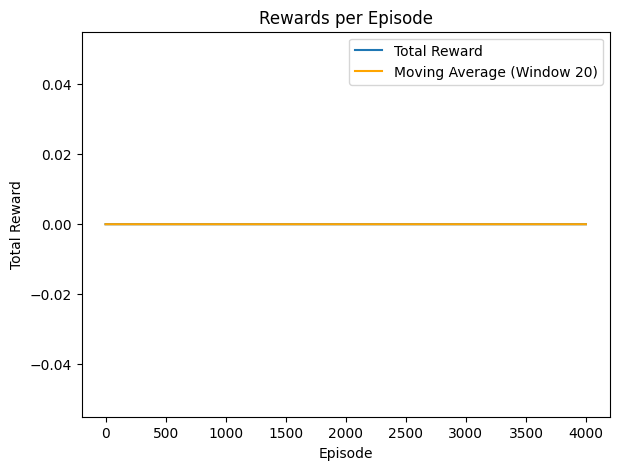

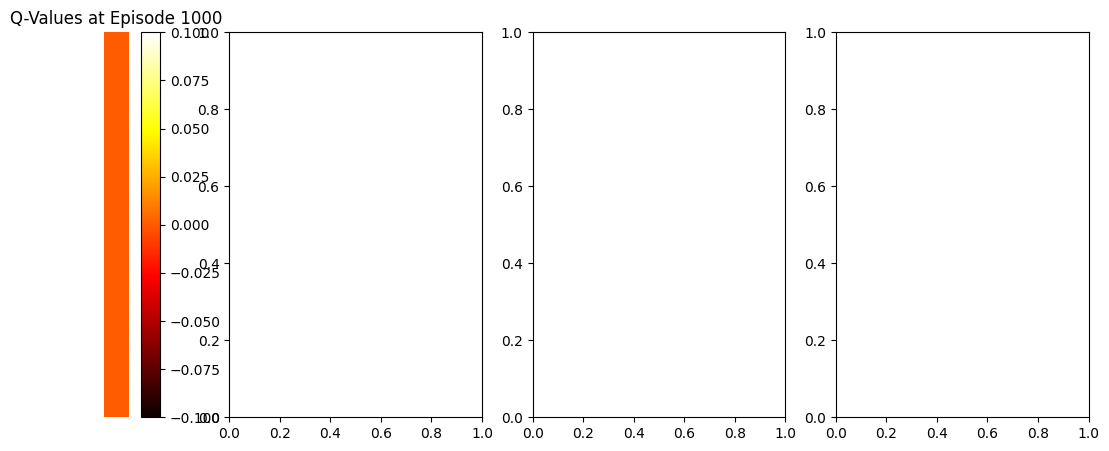

In [14]:
reinforced_learning_and_plots(t=100,
                              exploration_rate=0.01,
                              frequent_rewards=False,
                              is_slippery=False)

## t=100, exploration_rate=0.01, frequent_rewards=True, is_slippery=False
This makes the agent change his tactic, because he is penalised for wrong moves (exploration_rate is low) he is trying to get the path with max reward. Frequent Learning had huge impact becaues it allowed agent to finaly start updateing q-table.


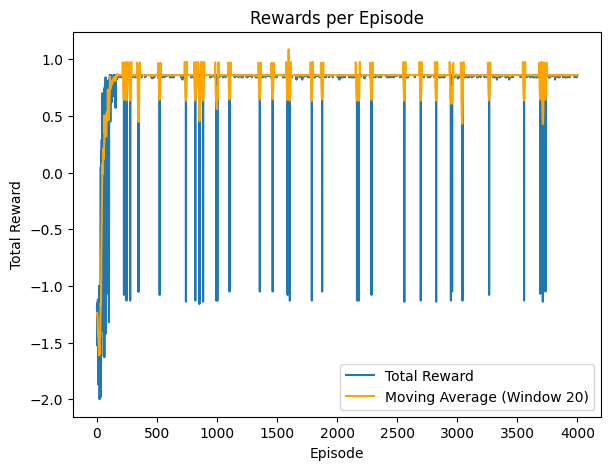

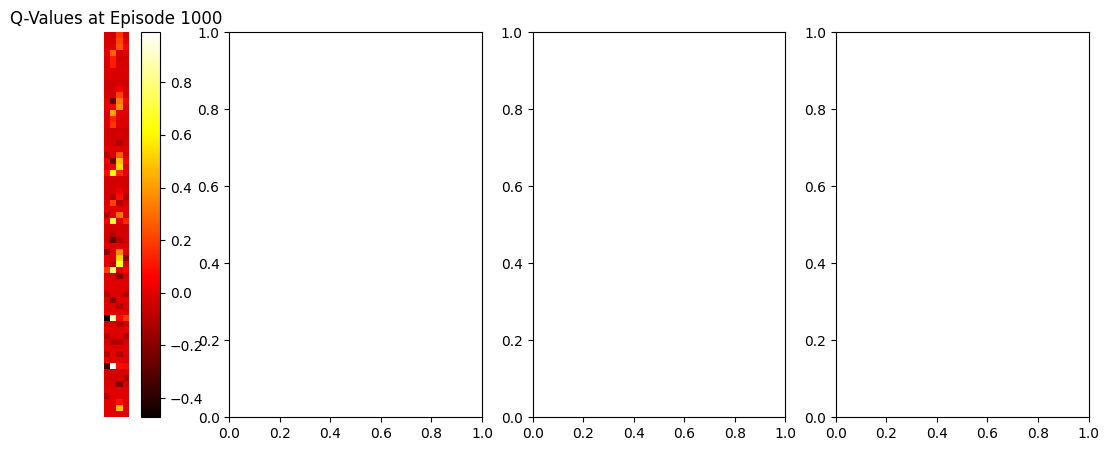

In [15]:
reinforced_learning_and_plots(t=100,
                              exploration_rate=0.01,
                              frequent_rewards=True,
                              is_slippery=False)

## t=1000, exploration_rate=0.01, frequent_rewards=True, is_slippery=False
Changing T to 1000, did not change much agent behaviour, only his first moves have lower reward.

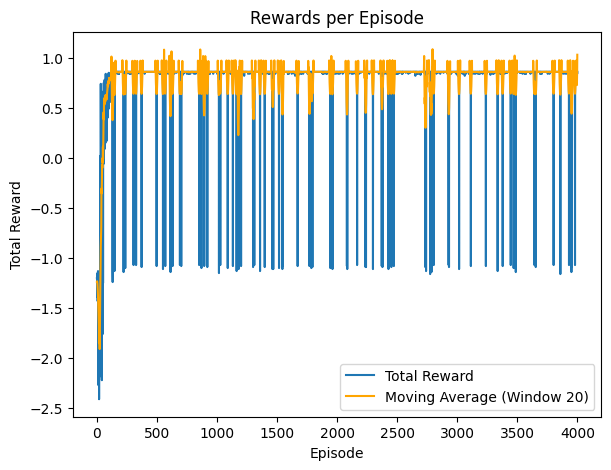

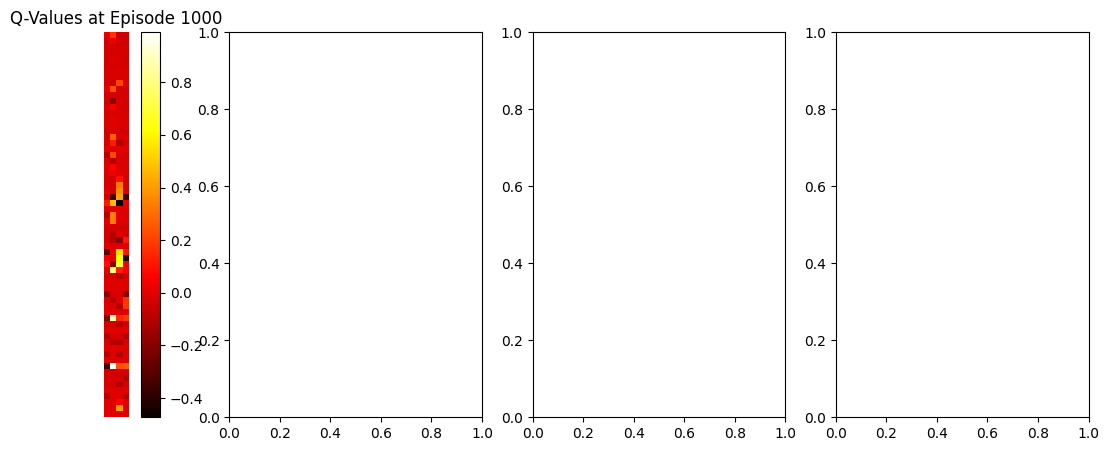

In [16]:
reinforced_learning_and_plots(t=1000,
                              exploration_rate=0.01,
                              frequent_rewards=True,
                              is_slippery=False)

## t=100, exploration_rate=0.01, frequent_rewards=True, is_slippery=True
Huge reward noise, but still agent is learning.

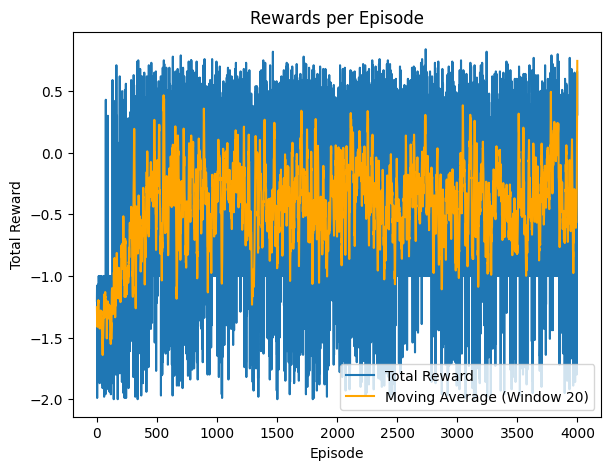

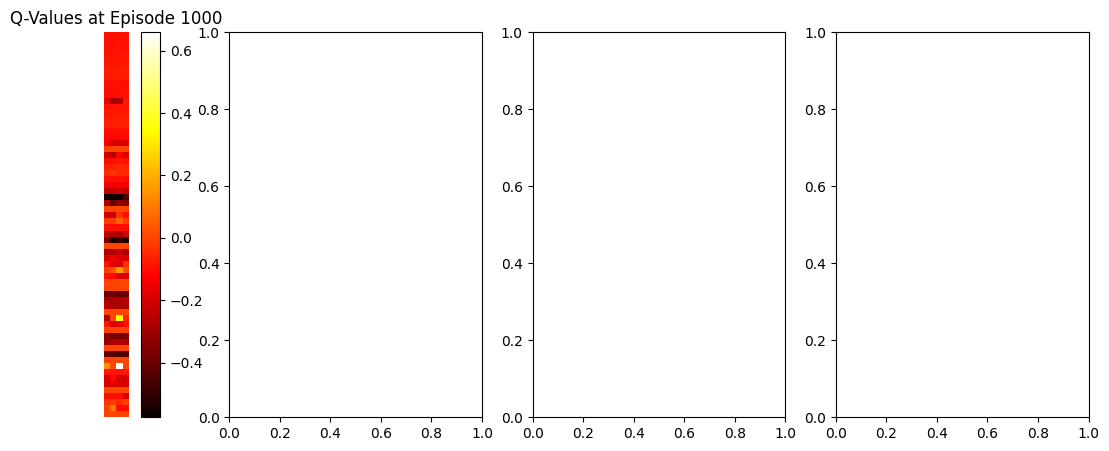

In [17]:
reinforced_learning_and_plots(t=100,
                              exploration_rate=0.01,
                              frequent_rewards=True,
                              is_slippery=True)

## t=100, exploration_rate=0.5, frequent_rewards=True, is_slippery=False
Moving average reword is always 0, due to agent choosing practically randomly. The fact that Q-learning is optimistic means that it is choosing a path with the highest potential reward.

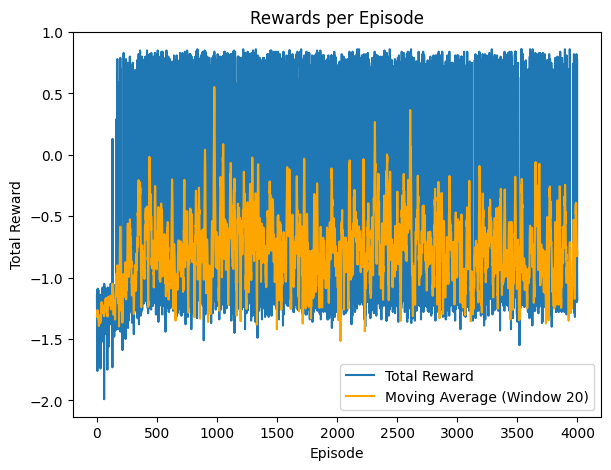

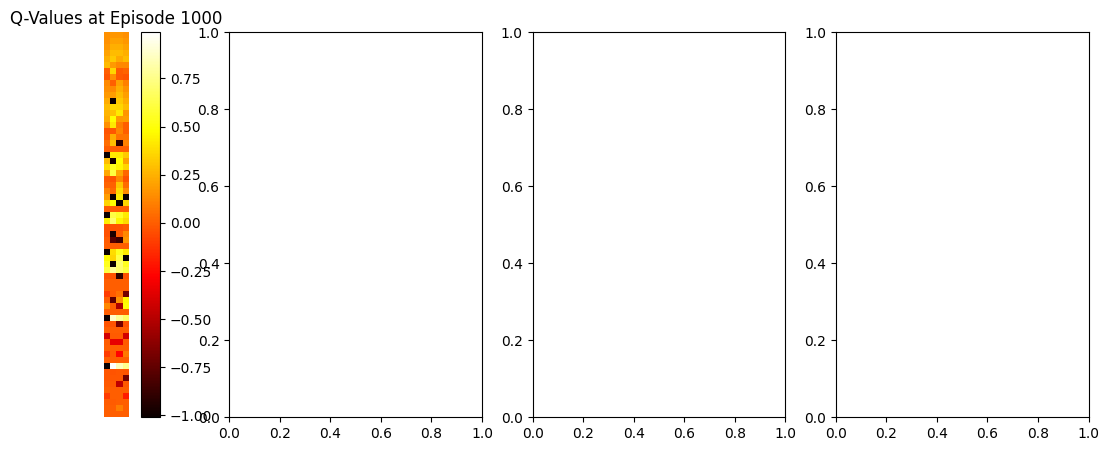

In [18]:
reinforced_learning_and_plots(t=100,
                              exploration_rate=0.5,
                              frequent_rewards=True,
                              is_slippery=False)

## Q-learning over thoughts
Using each experience only once to update the Q-table is disadvantage for rare events, because it leads to suboptimal or inaccurate Q-values (not taking advantage/avoiding of rare events). It can be a problem especially with small amount of learning episodes or small exploration rate.